# HSMA Exercise

The data loaded in this exercise is for seven acute stroke units, and whether a patient receives clost-busting treatment for stroke.

How accurately can you predict treatment?

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import  KFold, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings

rnd_state = 42
warnings.filterwarnings("ignore")

# Download data 
# (not required if running locally and have previously downloaded data)

download_required = False

if download_required:
    
    # Download processed data:
    address = 'https://raw.githubusercontent.com/MichaelAllen1966/' + \
                '2004_titanic/master/jupyter_notebooks/data/hsma_stroke.csv'        
    data = pd.read_csv(address)

    # Create a data subfolder if one does not already exist
    import os
    data_directory ='./data/'
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)

    # Save data to data subfolder
    data.to_csv(data_directory + 'hsma_stroke.csv', index=False)
    
# Load data    
data = pd.read_csv('data/hsma_stroke.csv')
# Make all data 'float' type
data = data.astype(float)
# Show data
data.head()

,Clotbuster given,Hosp_1,Hosp_2,Hosp_3,Hosp_4,Hosp_5,Hosp_6,Hosp_7,Male,Age,...,S2NihssArrivalFacialPalsy,S2NihssArrivalMotorArmLeft,S2NihssArrivalMotorArmRight,S2NihssArrivalMotorLegLeft,S2NihssArrivalMotorLegRight,S2NihssArrivalLimbAtaxia,S2NihssArrivalSensory,S2NihssArrivalBestLanguage,S2NihssArrivalDysarthria,S2NihssArrivalExtinctionInattention
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,...,3.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,...,2.0,0.0,4.0,1.0,4.0,0.0,1.0,2.0,2.0,1.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Clotbuster given                             1862 non-null   float64
 1   Hosp_1                                       1862 non-null   float64
 2   Hosp_2                                       1862 non-null   float64
 3   Hosp_3                                       1862 non-null   float64
 4   Hosp_4                                       1862 non-null   float64
 5   Hosp_5                                       1862 non-null   float64
 6   Hosp_6                                       1862 non-null   float64
 7   Hosp_7                                       1862 non-null   float64
 8   Male                                         1862 non-null   float64
 9   Age                                          1862 non-null   float64
 10  

## Script Plan

A basic plan for creating a MLAI model to predict if a clotbuster drug was given:

   1. Create a test train split for the data 20% / 80%. 
   <br>
   
   2. Feature selection on a subset of the training set. 
   <br>
   
   3. Stratified validation split to create the optimum model.
   <br>
   
   4. Assess the models accuracy against the test set.
   <br>
   
   5. Assess the model feature importance

In [3]:
# Create the test train split

X = data.drop('Clotbuster given',axis=1)
y = data['Clotbuster given']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= rnd_state)

### Data Exploration

Explore the structure of the data and the correlation of the features with each other and the target variable

col : Hosp_1


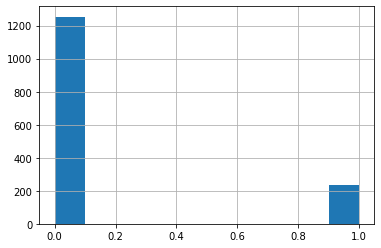

col : Hosp_2


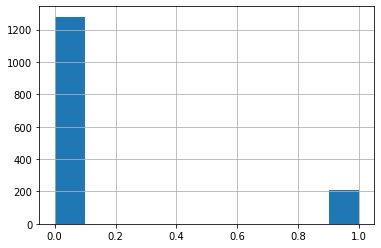

col : Hosp_3


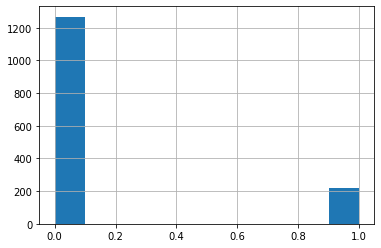

col : Hosp_4


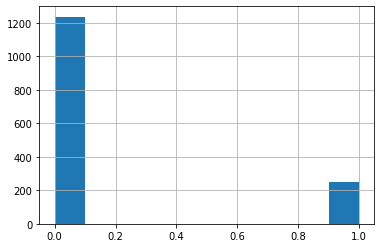

col : Hosp_5


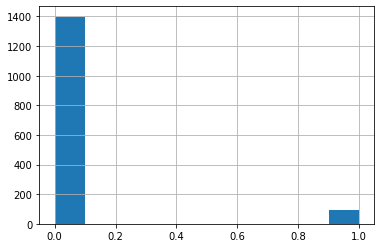

col : Hosp_6


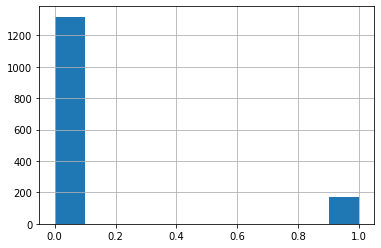

col : Hosp_7


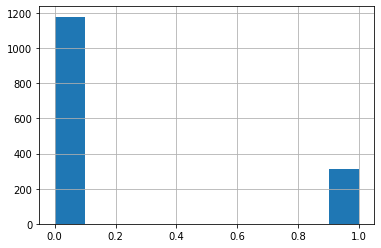

col : Male


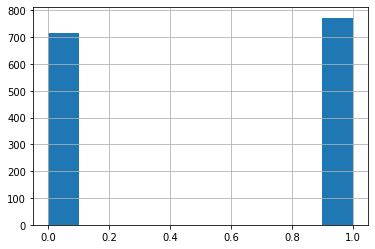

col : Age


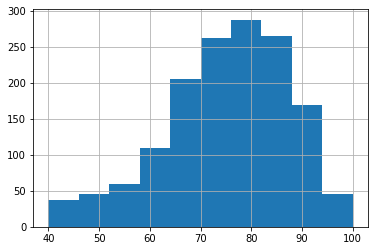

col : 80+


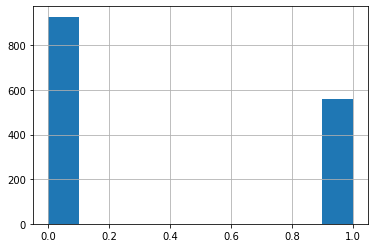

col : Onset Time Known Type_BE


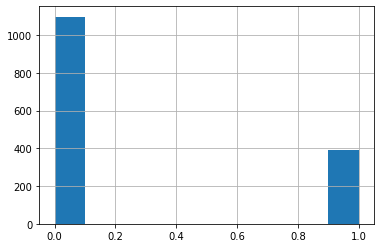

col : Onset Time Known Type_NK


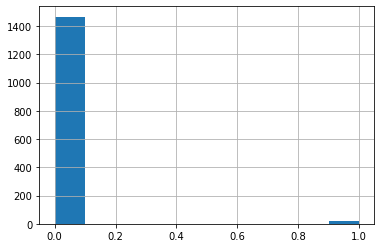

col : Onset Time Known Type_P


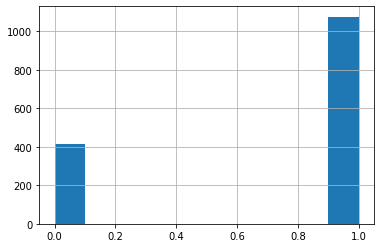

col : # Comorbidities


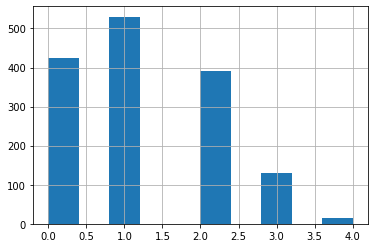

col : 2+ comorbidotes


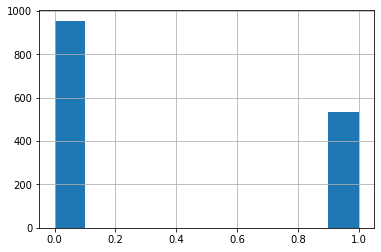

col : Congestive HF


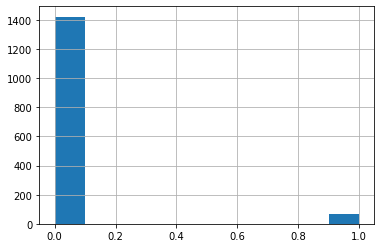

col : Hypertension


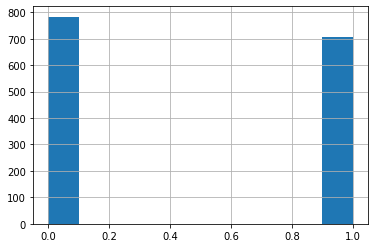

col : Atrial Fib


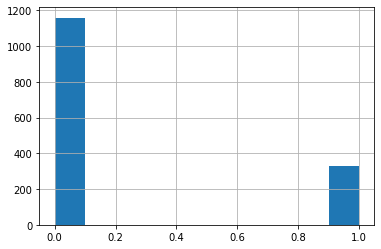

col : Diabetes


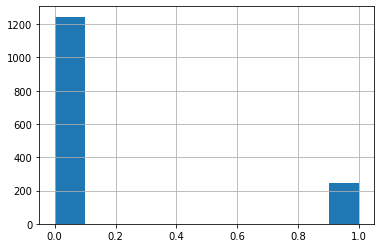

col : TIA


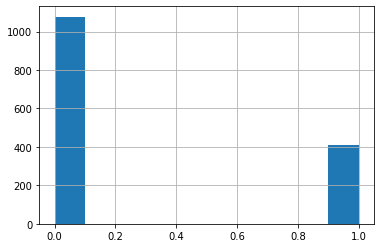

col : Co-mordity


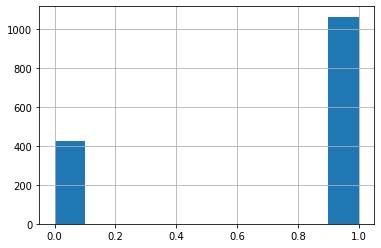

col : Antiplatelet_0


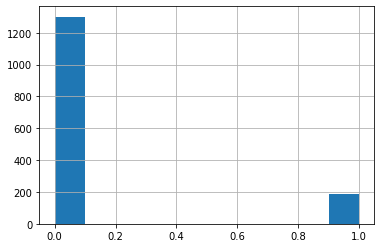

col : Antiplatelet_1


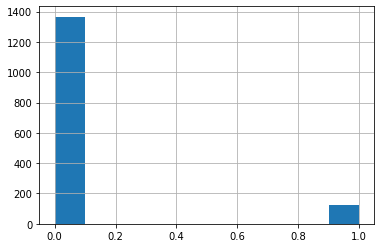

col : Antiplatelet_NK


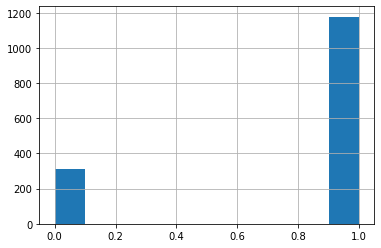

col : Anticoag before stroke_0


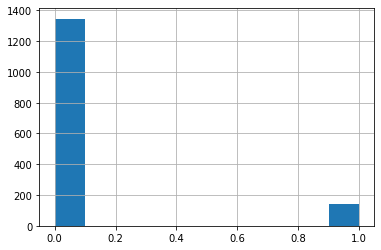

col : Anticoag before stroke_1


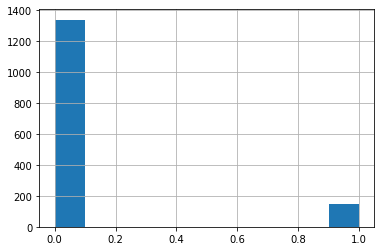

col : Anticoag before stroke_NK


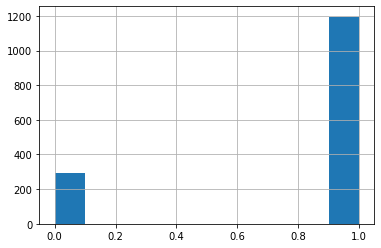

col : Stroke severity group_1. No stroke symtpoms


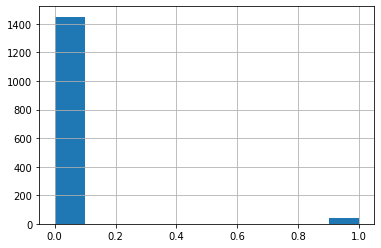

col : Stroke severity group_2. Minor


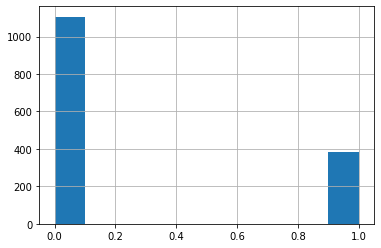

col : Stroke severity group_3. Moderate


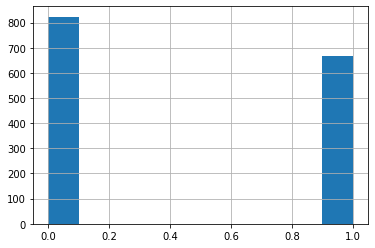

col : Stroke severity group_4. Moderate to severe


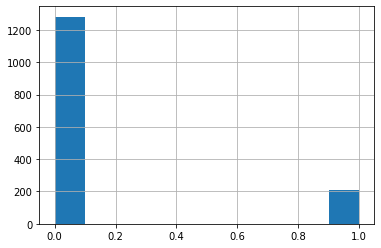

col : Stroke severity group_5. Severe


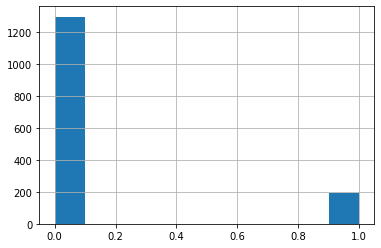

col : Stroke Type_I


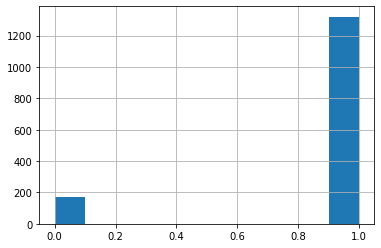

col : Stroke Type_PIH


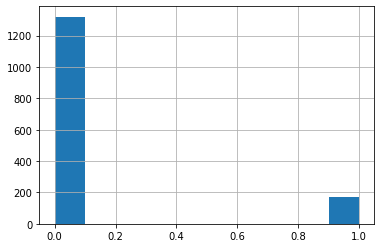

col : S2RankinBeforeStroke


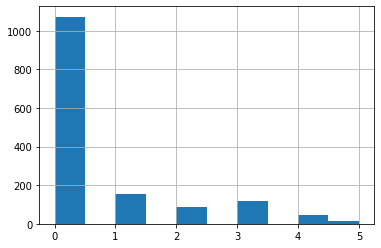

col : S2NihssArrival


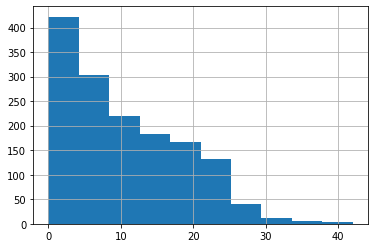

col : S2NihssArrivalLocQuestions


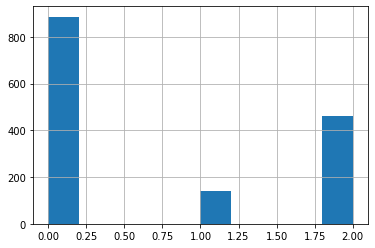

col : S2NihssArrivalLocCommands


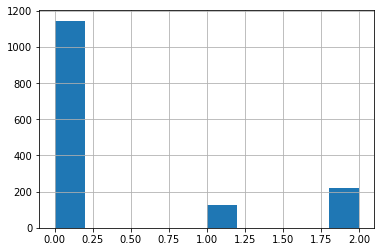

col : S2NihssArrivalBestGaze


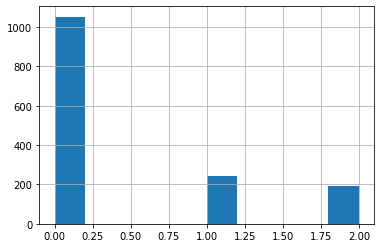

col : S2NihssArrivalVisual


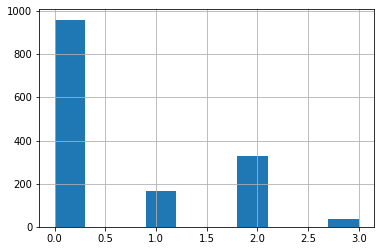

col : S2NihssArrivalFacialPalsy


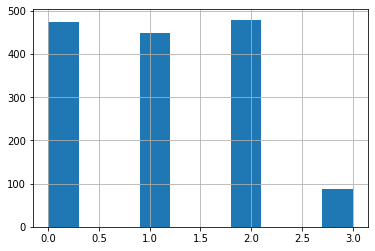

col : S2NihssArrivalMotorArmLeft


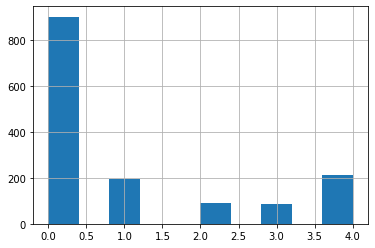

col : S2NihssArrivalMotorArmRight


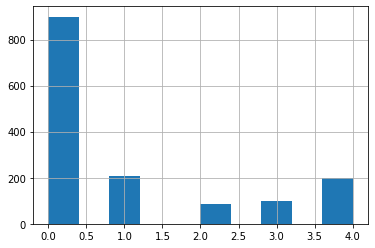

col : S2NihssArrivalMotorLegLeft


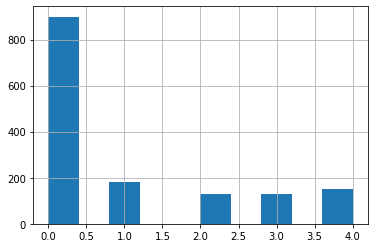

col : S2NihssArrivalMotorLegRight


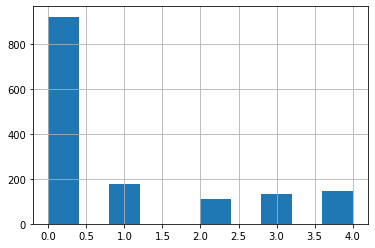

col : S2NihssArrivalLimbAtaxia


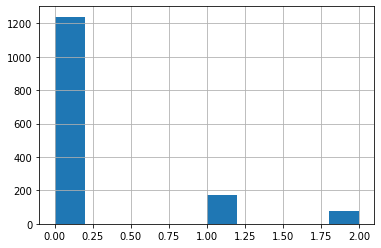

col : S2NihssArrivalSensory


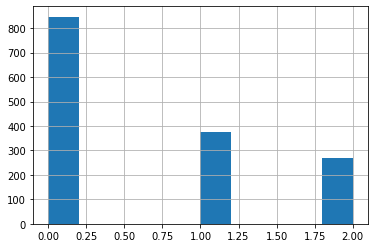

col : S2NihssArrivalBestLanguage


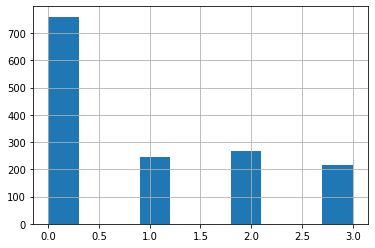

col : S2NihssArrivalDysarthria


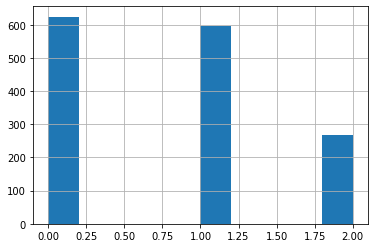

col : S2NihssArrivalExtinctionInattention


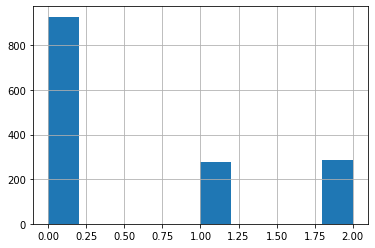

In [4]:
columns = X_train.columns

for col in columns:
    print(f"col : {col}")
    X_train[col].hist()
    plt.show()

col : Clotbuster given


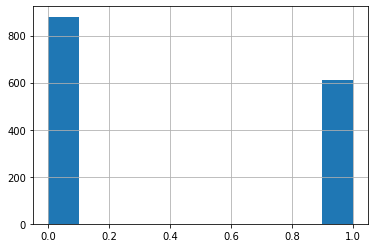

In [5]:
print(f"col : Clotbuster given")
y_train.hist()
plt.show()

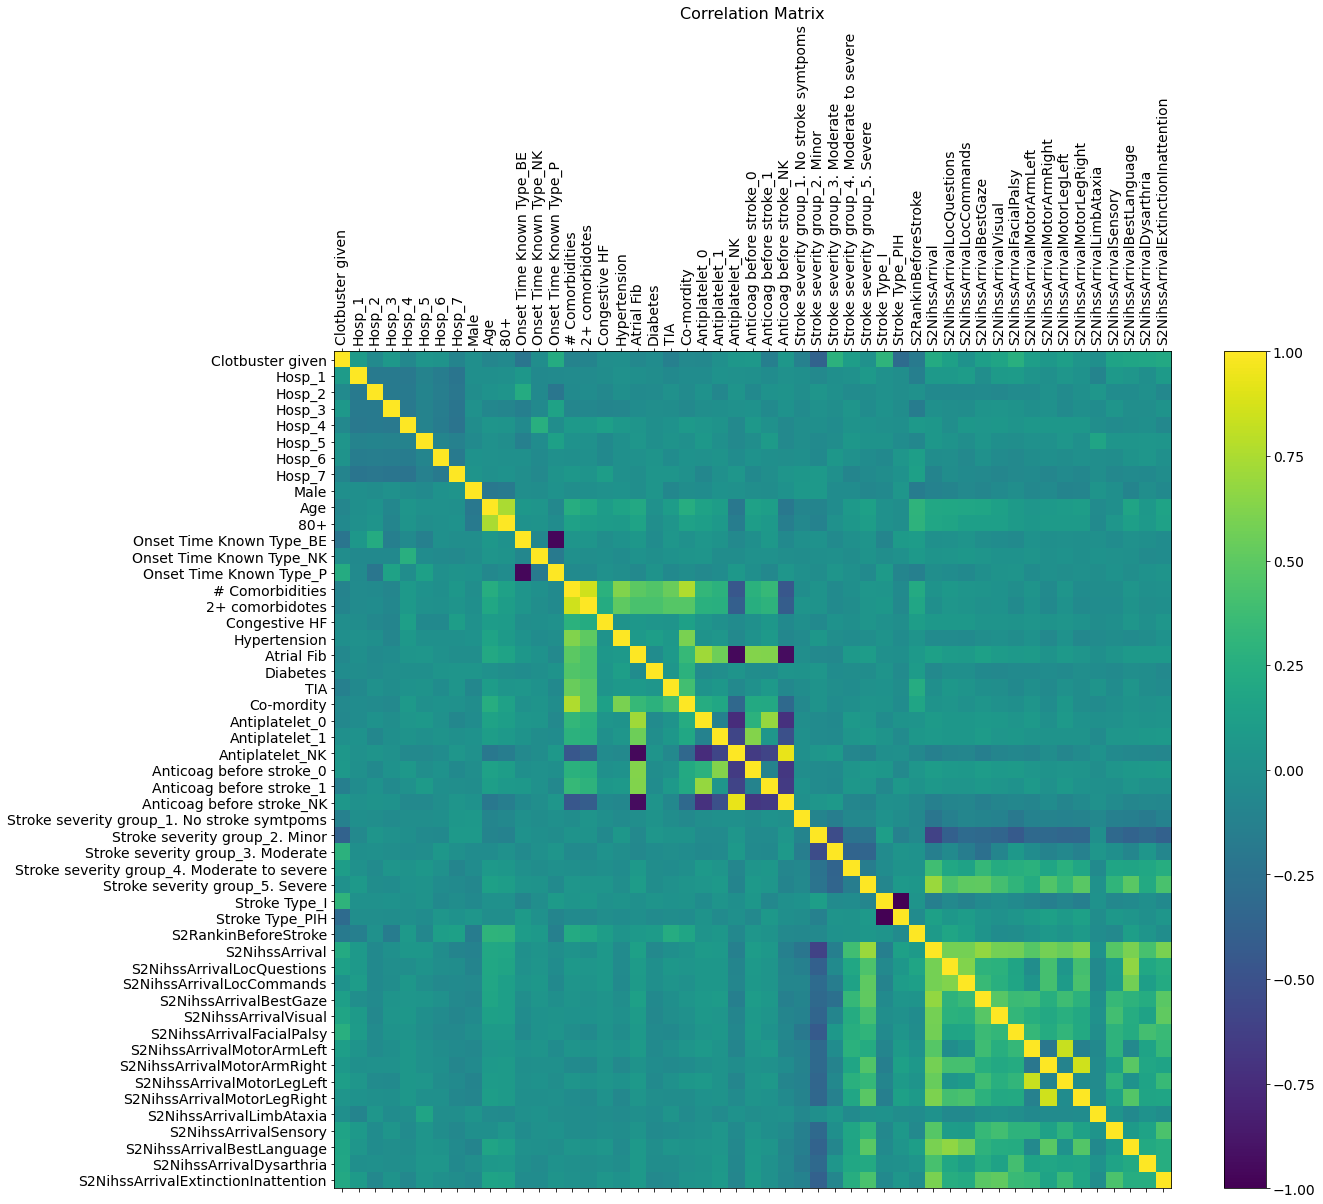

In [6]:
# Show data correlation
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Feature Removal

Remove highly correlated features

In [7]:
corr_matrix = X_train.corr().abs()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

new_X_cols = X_train.columns

print(f"Columns to remove: {to_drop}")

Columns to remove: ['Onset Time Known Type_P', 'Antiplatelet_NK', 'Stroke Type_PIH']


### Data Processing

Normalise the variables.

In [8]:
def standardise_data(X_train, X_test):
    
    # Initialise a new scaling object for normalising input data
    sc = StandardScaler() 

    # Set up the scaler just on the training set
    sc.fit(X_train)

    # Apply the scaler to the training and test sets
    train_std=sc.transform(X_train)
    test_std=sc.transform(X_test)
    
    return train_std, test_std

X_train, X_test = standardise_data(X_train, X_test)

### Nested Cross Validation to select Hyperparameters and Model



In [9]:
# Nested Cross Validation Parameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


models_and_parameters = {
   "DecisionTreeClassifier" : (
    DecisionTreeClassifier(random_state = rnd_state),
        {
            "max_depth" : [None, 2, 4, 8, 16, 32],
            "max_features" : [None, "sqrt", "log2"]
        }
    ),
    
    "RandomForestClassifier" : (
    RandomForestClassifier(random_state = rnd_state),
        {
            "max_depth" : [None, 2, 4, 8, 16, 32],
            "max_features" : [None, "sqrt", "log2"],
            "bootstrap" : [True, False]
        }        
    ),
    
    "LogisticRegression" : (
    LogisticRegression(random_state = rnd_state, solver = "saga", 
                       l1_ratio= 0.5),
        {
            "penalty" : ["l1", "l2", "elasticnet", "none"],
            "tol" : [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
            "C": [0.01, 0.05, 0.1, 0.5, 1],
            "fit_intercept" : [True, False]
        }        
    )  
}

In [10]:
# Taken from: https://datascience.stackexchange.com/questions/13185

# Declare the inner and outer cross-validation strategies
outer_cv = KFold(n_splits=5, shuffle=True, random_state = rnd_state)
inner_cv = KFold(n_splits=5, shuffle=True, random_state = rnd_state)

# scores accross the folds
average_scores_across_outer_folds_for_each_model = {}

# find the model with the best generalization error
for name, (model, params) in models_and_parameters.items():
    
    # A classifier that chooses its hyperparameters automatically 
    # using `inner_cv`
    classifier = GridSearchCV(
        estimator=model, param_grid=params,
        cv = inner_cv, scoring = 'f1_weighted')
    
    # estimate generalization error on the 3-fold splits of the data
    scores_across_outer_folds = cross_val_score(
        classifier, X_train, y_train, cv = outer_cv, 
        scoring='f1_weighted')
    
    # get the mean MSE across each of outer_cv's 3 folds
    average_scores_across_outer_folds_for_each_model[name] = np.mean(scores_across_outer_folds)
    error_summary = 'Model: {name}\n F1 weighted in the 3 outer folds: {scores}.\nAverage error: {avg}'
    print(error_summary.format(
        name=name, scores=scores_across_outer_folds,
        avg=np.mean(scores_across_outer_folds)))
    print()

print('Average score across the outer folds: ',
      average_scores_across_outer_folds_for_each_model)

many_stars = '\n' + '*' * 100 + '\n'
print(many_stars + 'Now we choose the best model and refit on the whole dataset' + many_stars)

best_model_name, best_model_avg_score = max(
    average_scores_across_outer_folds_for_each_model.items(),
    key=(lambda name_averagescore: name_averagescore[1]))

# get the best model and its associated parameter grid
best_model, best_model_params = models_and_parameters[best_model_name]

# Refit the best model on the whole dataset
final_classifier = GridSearchCV(best_model, best_model_params, cv=inner_cv)
final_classifier.fit(X_train, y_train)


print('Best model: \n\t{}'.format(best_model), end='\n\n')
print('Estimation of its generalization score (F1 Weighted):\n\t{}'.format(
    best_model_avg_score), end='\n\n')
print('Best parameter choice for this model: \n\t{params}'
      '\n(according to cross-validation `{cv}` on the whole dataset).'.format(
      params=final_classifier.best_params_, cv=inner_cv))

Model: DecisionTreeClassifier
 F1 weighted in the 3 outer folds: [0.75571621 0.76527376 0.78797222 0.78874133 0.76766011].
Average error: 0.7730727267585444

Model: RandomForestClassifier
 F1 weighted in the 3 outer folds: [0.75451524 0.79495812 0.79753324 0.79535535 0.79415617].
Average error: 0.7873036231236881

Model: LogisticRegression
 F1 weighted in the 3 outer folds: [0.77794546 0.80122396 0.81023331 0.81879195 0.78396186].
Average error: 0.7984313050879528

Average score across the outer folds:  {'DecisionTreeClassifier': 0.7730727267585444, 'RandomForestClassifier': 0.7873036231236881, 'LogisticRegression': 0.7984313050879528}

****************************************************************************************************
Now we choose the best model and refit on the whole dataset
****************************************************************************************************

Best model: 
	LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
 

### Predict on the Test Data Set

Using the best model predict what would happen on the test dataset.

In [47]:
y_pred = final_classifier.predict(X_test)
f1_score_ = f1_score(y_test.values, y_pred, average = "weighted")
acc = accuracy_score(y_test, y_pred)

print(f"Final model weighted F1 score on the test set {f1_score_:.3f}")
print(f"Final model accuracy on the test set was {acc:.3f}")

Final model weighted F1 score on the test set 0.826
Final model accuracy on the test set was 0.826


In [16]:
try:
    imps = np.array(final_classifier.best_estimator_.feature_importances_)
except:
    imps = np.array(final_classifier.best_estimator_.coef_[0])
    
cols = np.array(new_X_cols)

arr1inds = imps.argsort()

sorted_arr1 = imps[arr1inds[::-1]]
sorted_arr2 = cols[arr1inds[::-1]]

for feat, imp in zip(sorted_arr2, sorted_arr1):
    print(f'feature: {feat}, importance: {imp}')

feature: Stroke Type_I, importance: 1.8095025022772826
feature: Stroke severity group_3. Moderate, importance: 0.5587232874286752
feature: S2NihssArrivalBestLanguage, importance: 0.43177132988462874
feature: Stroke severity group_4. Moderate to severe, importance: 0.2617864484225252
feature: Anticoag before stroke_0, importance: 0.24594219961994834
feature: S2NihssArrivalLocQuestions, importance: 0.23454878888480277
feature: S2NihssArrivalExtinctionInattention, importance: 0.21152736082526521
feature: S2NihssArrivalFacialPalsy, importance: 0.19635561662429632
feature: S2NihssArrivalMotorArmRight, importance: 0.19261055485227188
feature: Hypertension, importance: 0.18284033064049715
feature: S2NihssArrivalBestGaze, importance: 0.17429019301337492
feature: Hosp_1, importance: 0.16876367122490285
feature: S2NihssArrivalMotorLegLeft, importance: 0.15461788251061492
feature: S2NihssArrivalMotorArmLeft, importance: 0.08916005880640597
feature: Male, importance: 0.0801999980458855
feature: S2

In [17]:
try:
    imps = np.array(final_classifier.best_estimator_.feature_importances_)
except:
    imps = np.abs(np.array(final_classifier.best_estimator_.coef_[0]))
    
cols = np.array(new_X_cols)

arr1inds = imps.argsort()

sorted_arr1 = imps[arr1inds[::-1]]
sorted_arr2 = cols[arr1inds[::-1]]

for feat, imp in zip(sorted_arr2, sorted_arr1):
    print(f'feature: {feat}, importance: {imp}')

feature: Stroke Type_I, importance: 1.8095025022772826
feature: Stroke severity group_2. Minor, importance: 0.7086539848340483
feature: Stroke severity group_3. Moderate, importance: 0.5587232874286752
feature: Onset Time Known Type_BE, importance: 0.5494343157597856
feature: S2RankinBeforeStroke, importance: 0.4521479177105303
feature: S2NihssArrivalBestLanguage, importance: 0.43177132988462874
feature: S2NihssArrival, importance: 0.40866185495293117
feature: Stroke severity group_1. No stroke symtpoms, importance: 0.3597625827452922
feature: Age, importance: 0.27405292386480506
feature: Stroke severity group_4. Moderate to severe, importance: 0.2617864484225252
feature: Anticoag before stroke_0, importance: 0.24594219961994834
feature: S2NihssArrivalLocQuestions, importance: 0.23454878888480277
feature: TIA, importance: 0.23310569360192956
feature: Anticoag before stroke_1, importance: 0.22118122854052039
feature: S2NihssArrivalExtinctionInattention, importance: 0.21152736082526521
f